In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:\\Users\\al6436\\Desktop\\Use Case\\heart_failure_prediction.csv")

In [2]:
print("Dataset Info:")
df.info()

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      10000 non-null  int64  
 1   Gender                   10000 non-null  object 
 2   Chest_Pain_Type          10000 non-null  object 
 3   Resting_BP               10000 non-null  int64  
 4   Cholesterol              10000 non-null  int64  
 5   Fasting_Blood_Sugar      10000 non-null  int64  
 6   Resting_ECG              10000 non-null  object 
 7   Max_Heart_Rate           10000 non-null  int64  
 8   Exercise_Induced_Angina  10000 non-null  int64  
 9   Oldpeak                  10000 non-null  float64
 10  Slope                    10000 non-null  object 
 11  Num_Major_Vessels        10000 non-null  int64  
 12  Thalassemia              10000 non-null  object 
 13  Diabetes                 10000 non-null  int64  
 14  Smoking_H

In [8]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age                           0
Gender                        0
Chest_Pain_Type               0
Resting_BP                    0
Cholesterol                   0
Fasting_Blood_Sugar           0
Resting_ECG                   0
Max_Heart_Rate                0
Exercise_Induced_Angina       0
Oldpeak                       0
Slope                         0
Num_Major_Vessels             0
Thalassemia                   0
Diabetes                      0
Smoking_History               0
Alcohol_Consumption        3350
Physical_Activity_Level       0
Family_History                0
BMI                           0
Heart_Failure                 0
dtype: int64


In [3]:
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


Number of outliers detected per column:
Age                        0
Resting_BP                 0
Cholesterol                0
Fasting_Blood_Sugar        0
Max_Heart_Rate             0
Exercise_Induced_Angina    0
Oldpeak                    0
Num_Major_Vessels          0
Diabetes                   0
Family_History             0
BMI                        0
Heart_Failure              0
dtype: int64


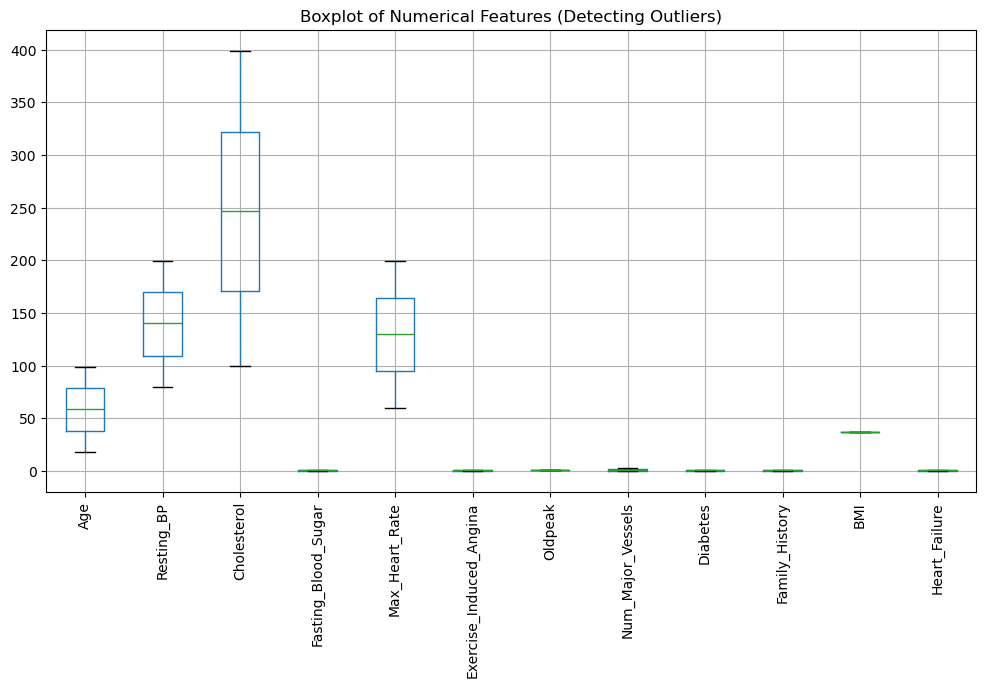

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
df_numeric = df.select_dtypes(include=["number"])

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Detect outliers (below Q1 - 1.5*IQR or above Q3 + 1.5*IQR)
outliers = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).sum()

# Print number of outliers per column
print("Number of outliers detected per column:")
print(outliers)

# Plot boxplots for numerical features to visualize outliers
plt.figure(figsize=(12, 6))
df_numeric.boxplot(rot=90)  # Rotating labels for better visibility
plt.title("Boxplot of Numerical Features (Detecting Outliers)")
plt.show()


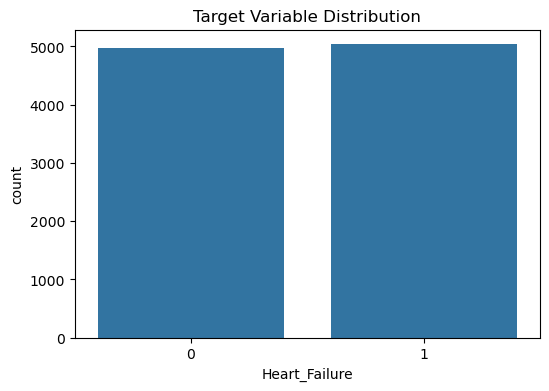

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Heart_Failure']) 
plt.title("Target Variable Distribution")
plt.show()

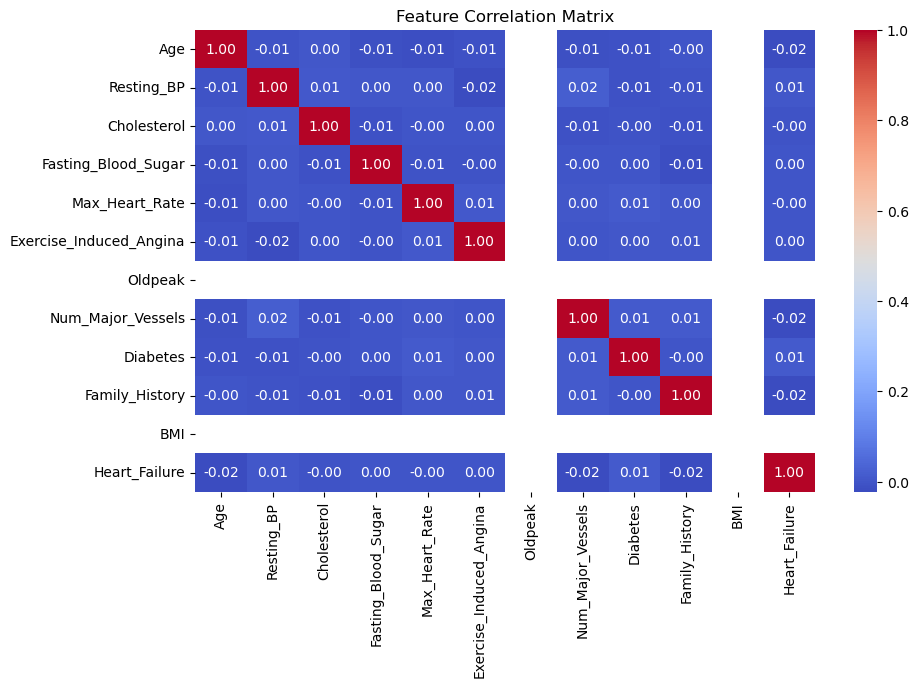

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


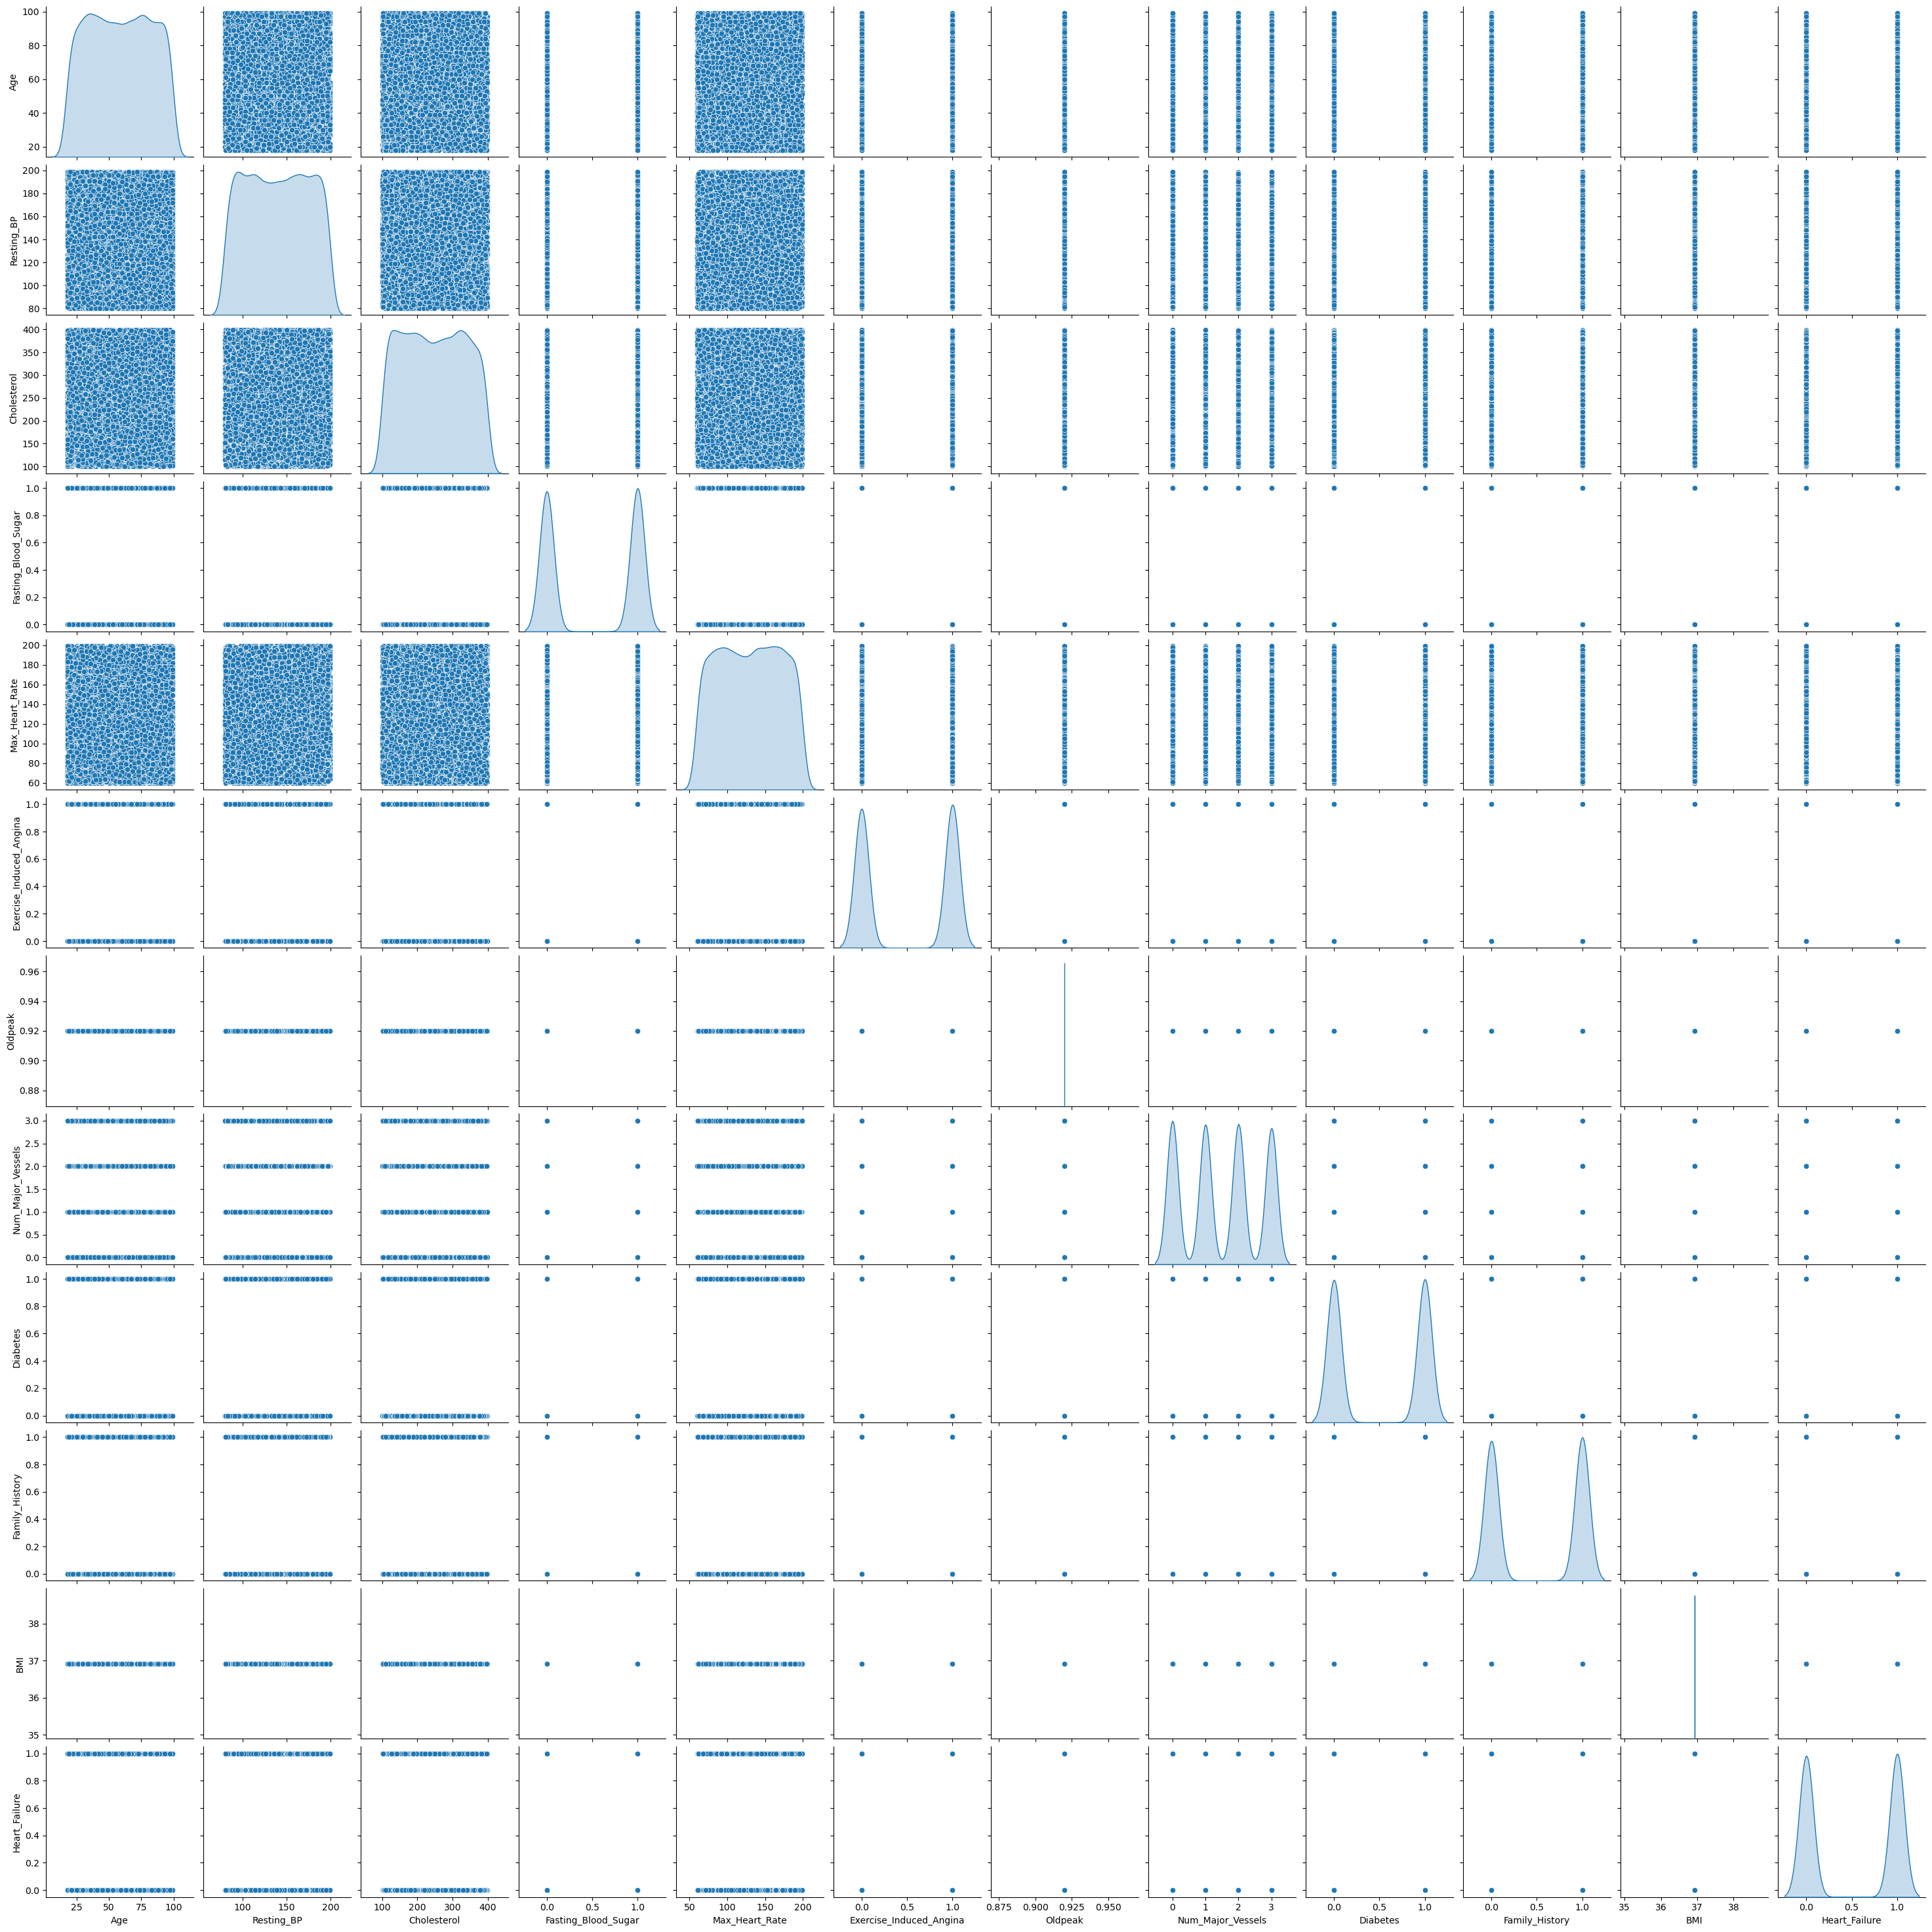

In [15]:
sns.pairplot(df, diag_kind='kde')
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert categorical to numerical values
    label_encoders[col] = le

In [17]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop("Heart_Failure", axis=1)  # Replace 'target' with your actual target column
y = df["Heart_Failure"]
importance = mutual_info_classif(X, y)

feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)
print(feature_importance)


Chest_Pain_Type            0.009736
Resting_BP                 0.008707
BMI                        0.007246
Age                        0.006254
Smoking_History            0.003943
Exercise_Induced_Angina    0.003168
Diabetes                   0.002301
Fasting_Blood_Sugar        0.001996
Physical_Activity_Level    0.001882
Num_Major_Vessels          0.001836
Oldpeak                    0.001305
Family_History             0.000429
Cholesterol                0.000000
Resting_ECG                0.000000
Max_Heart_Rate             0.000000
Gender                     0.000000
Slope                      0.000000
Thalassemia                0.000000
Alcohol_Consumption        0.000000
dtype: float64


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop("Heart_Failure", axis=1)  # Features
y = df["Heart_Failure"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.5038


In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
print("CV Accuracy:", scores.mean())


CV Accuracy: 0.514


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)


Best Params: {'max_depth': 10, 'n_estimators': 100}


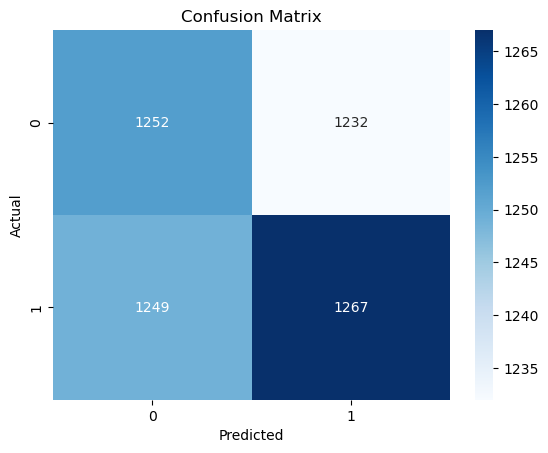

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.4916


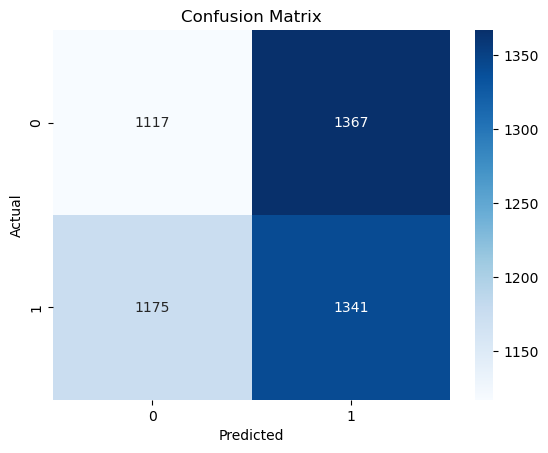

In [30]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

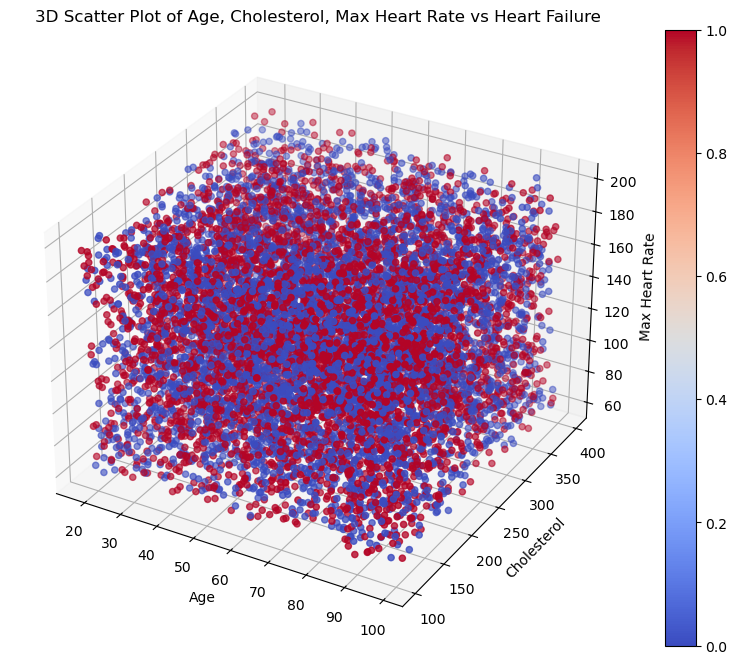

In [7]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot for Age, Cholesterol, and Max Heart Rate vs Heart Failure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define the data
x = df['Age']
y = df['Cholesterol']
z = df['Max_Heart_Rate']
c = df['Heart_Failure']  # color by target variable

# Create the scatter plot
sc = ax.scatter(x, y, z, c=c, cmap='coolwarm', marker='o')

# Add labels
ax.set_xlabel('Age')
ax.set_ylabel('Cholesterol')
ax.set_zlabel('Max Heart Rate')

# Add a colorbar for the target variable
plt.colorbar(sc)
plt.title('3D Scatter Plot of Age, Cholesterol, Max Heart Rate vs Heart Failure')
plt.show()

In [8]:
df["Resting_ECG"] = df["Resting_ECG"].astype(str)

# Filter John's case: Age > 60, Diabetes, High BP, and ECG Abnormalities
john_case = df[(df["Age"] > 60) & (df["Diabetes"] == 1) & (df["High_BP"] == 1) & (df["Resting_ECG"] != "Normal")]

# **Plot 1: Distribution of Heart Failure Cases in Patients Like John**
plt.figure(figsize=(6, 4))
sns.countplot(data=john_case, x="Heart_Failure", palette="coolwarm")
plt.xlabel("Heart Failure (0 = No, 1 = Yes)")
plt.ylabel("Count of Patients")
plt.title("Heart Failure Cases in Patients Like John")
plt.show()

# **Plot 2: Boxplot of Age vs. Heart Failure for John's Risk Group**
plt.figure(figsize=(6, 4))
sns.boxplot(data=john_case, x="Heart_Failure", y="Age", palette="coolwarm")
plt.xlabel("Heart Failure (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.title("Age Distribution in High-Risk Patients (Like John)")
plt.show()

# **Plot 3: Stacked Bar Chart for Risk Factors (Diabetes, High BP)**
risk_factors = john_case.groupby(["Heart_Failure"])[["Diabetes", "High_BP"]].sum()
risk_factors.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(6, 4))
plt.xlabel("Heart Failure (0 = No, 1 = Yes)")
plt.ylabel("Count of Risk Factors")
plt.title("Stacked Risk Factors for John's Case")
plt.legend(["Diabetes", "High BP"])
plt.show()

KeyError: 'High_BP'

In [9]:
df.head

<bound method NDFrame.head of       Age  Gender Chest_Pain_Type  Resting_BP  Cholesterol  \
0      69    Male        Atypical         106          250   
1      32    Male     Non-anginal         124          396   
2      89  Female     Non-anginal         164          256   
3      78  Female         Typical         116          297   
4      38    Male     Non-anginal          88          386   
...   ...     ...             ...         ...          ...   
9995   49  Female    Asymptomatic         103          280   
9996   39    Male        Atypical         162          249   
9997   72    Male     Non-anginal         139          181   
9998   74    Male     Non-anginal         172          109   
9999   30    Male        Atypical         156          379   

      Fasting_Blood_Sugar                   Resting_ECG  Max_Heart_Rate  \
0                       1         ST-T Wave Abnormality             171   
1                       1  Left Ventricular Hypertrophy              73   


C:\Users\al6436\AppData\Local\Temp\ipykernel_19096\3420193013.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=john_case, x="Heart_Failure", palette="coolwarm")


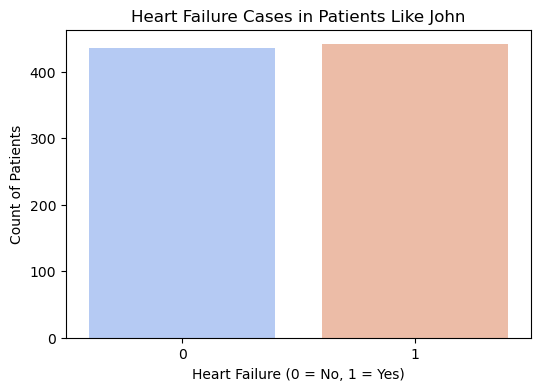

C:\Users\al6436\AppData\Local\Temp\ipykernel_19096\3420193013.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=john_case, x="Heart_Failure", y="Age", palette="coolwarm")


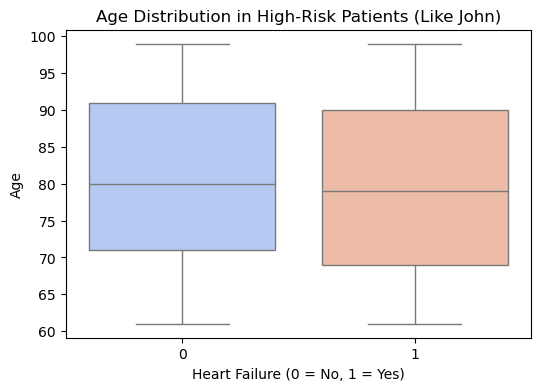

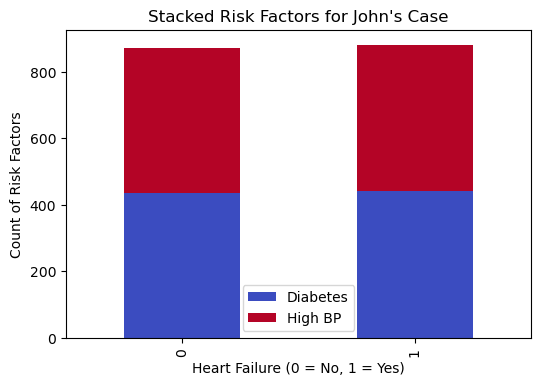

In [10]:
df["Resting_ECG"] = df["Resting_ECG"].astype(str)

# Define "High BP" based on Resting_BP values
df["High_BP"] = df["Resting_BP"] > 130  # Assumption: Resting BP > 130 is high

# Filter John's case: Age > 60, Diabetes, High BP, and ECG Abnormalities
john_case = df[(df["Age"] > 60) & (df["Diabetes"] == 1) & (df["High_BP"] == True) & (df["Resting_ECG"] != "Normal")]

# **Plot 1: Distribution of Heart Failure Cases in Patients Like John**
plt.figure(figsize=(6, 4))
sns.countplot(data=john_case, x="Heart_Failure", palette="coolwarm")
plt.xlabel("Heart Failure (0 = No, 1 = Yes)")
plt.ylabel("Count of Patients")
plt.title("Heart Failure Cases in Patients Like John")
plt.show()

# **Plot 2: Boxplot of Age vs. Heart Failure for John's Risk Group**
plt.figure(figsize=(6, 4))
sns.boxplot(data=john_case, x="Heart_Failure", y="Age", palette="coolwarm")
plt.xlabel("Heart Failure (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.title("Age Distribution in High-Risk Patients (Like John)")
plt.show()

# **Plot 3: Stacked Bar Chart for Risk Factors (Diabetes, High BP)**
risk_factors = john_case.groupby(["Heart_Failure"])[["Diabetes", "High_BP"]].sum()
risk_factors.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(6, 4))
plt.xlabel("Heart Failure (0 = No, 1 = Yes)")
plt.ylabel("Count of Risk Factors")
plt.title("Stacked Risk Factors for John's Case")
plt.legend(["Diabetes", "High BP"])
plt.show()